## Step 4: Toward a Realistic Data Set - SVHN Pre-Processing

Once you have settled on a good architecture, you can train your model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

In [1]:
from os import chdir; chdir('..')

### Retrieve the SVHN dataset

Define code and/or use the predefined code in the `lib.retrieval` module in order to download the SVHN dataset if you do not already have a local copy. You can use the urls, http://ufldl.stanford.edu/housenumbers/train.tar.gz, http://ufldl.stanford.edu/housenumbers/test.tar.gz, and http://ufldl.stanford.edu/housenumbers/extra.tar.gz, to download the test, train, and extra datasets, respectively.

#### Data Overview
10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.

|      set | digits | expected bytes |
|:--------:|:------:|:--------------:|
| training |  73257 |      404141560 |
| testing  |  26032 |      276555967 |
| extra    | 531131 |     1955489752 | 

In [2]:
%%bash
if [ ! -f data/train.tar.gz ]; then 
    wget -O data/train.tar.gz http://ufldl.stanford.edu/housenumbers/train.tar.gz; tar -xvzf data/train.tar.gz
fi
if [ ! -f data/test.tar.gz ]; then 
    wget -O data/test.tar.gz http://ufldl.stanford.edu/housenumbers/test.tar.gz; tar -xvzf data/test.tar.gz
fi
ls -1 data/train | wc -l
ls -1 data/test | wc -l

33403
13070


### Prepare the SVHN dataset

Define code in the `lib.preprocess` module that will prepare a data dictionary containing your shuffled and split SVHN dataset as well as do any additional preprocessing you find necessary.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
import numpy as np
from scipy.misc import imread
from lib.preprocess import svhn_meta_from_mat, prepare_svhn_dataset, process_all_images
from lib.data import pickle_data_dictionary

Using TensorFlow backend.


In [4]:
test_images_info = svhn_meta_from_mat('data/test/digitStruct.mat')
train_images_info = svhn_meta_from_mat('data/train/digitStruct.mat')

In [5]:
!mkdir -p data/test_proc data/train_proc

In [6]:
process_all_images('data/test/','data/test_proc/',test_images_info)
process_all_images('data/train/','data/train_proc/',train_images_info)

In [16]:
test_set, test_labels = prepare_svhn_dataset('data/test_proc/', test_images_info)
train_set, train_labels = prepare_svhn_dataset('data/train_proc/', train_images_info)

In [28]:
valid_set, valid_labels = test_set[10000:], [v[10000:] for v in test_labels]
test_set_split, test_labels_split = test_set[:10000], [v[:10000] for v in test_labels]

In [29]:
data_dictionary = {
    'test_set' : test_set_split,
    'train_set' : train_set,
    'test_labels' : test_labels_split,
    'train_labels' : train_labels,
    'valid_set' : valid_set,
    'valid_labels' : valid_labels
}

### Pickle your preprocessed SVHN dataset

In [30]:
pickle_data_dictionary(data_dictionary, 'data/svhn.pickle')

('Compressed pickle size:', 429455842)


### Prepare a few plots of samples of your Synthetic Dataset

In [31]:
test_images_info[5]

{'filename': '6.png',
 'height': [array(23.0)],
 'labels': [array(1.0)],
 'left': [array(40.0)],
 'length': 1,
 'top': [array(11.0)],
 'width': [array(7.0)]}

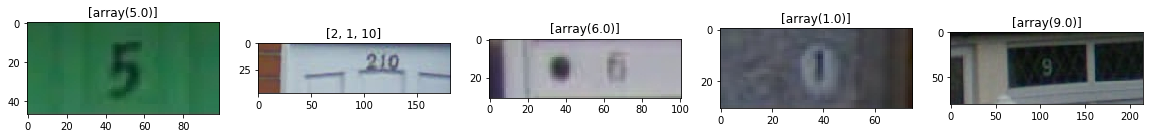

In [32]:
fig = plt.figure(figsize=(20,4))

for i in range(5):
    fig.add_subplot(151+i)
    read_image = imread('data/test/'+test_images_info[i]['filename'])
    plt.title(test_images_info[i]['labels'])
    plt.imshow(read_image)

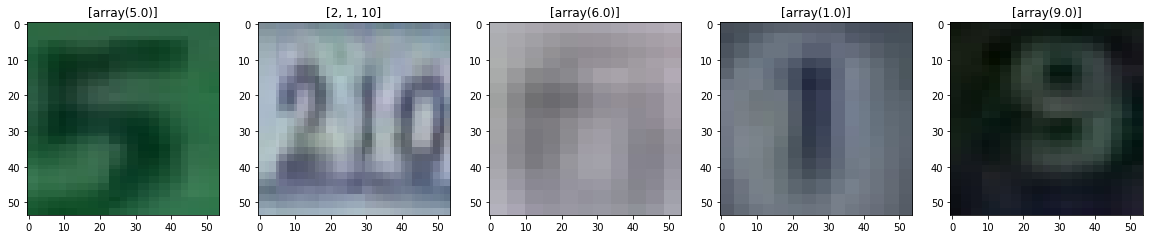

In [33]:
fig = plt.figure(figsize=(20,4))

for i in range(5):
    fig.add_subplot(151+i)
    read_image = imread('data/test_proc/'+test_images_info[i]['filename'])
    plt.title(test_images_info[i]['labels'])
    plt.imshow(read_image)